In [1]:
import os

from qiskit.extensions.standard import ccx
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, execute
from qiskit import IBMQ, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city

IBMQ.enable_account(os.getenv('IBMQ'))
backend = Aer.get_backend('statevector_simulator')

/Users/kitakarashin/opt/anaconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The module qiskit.extensions.standard is deprecated as of 0.14.0 and will be removed no earlier than 3 months after the release. You should import the standard gates from qiskit.circuit.library.standard_gates instead.
  """Entry point for launching an IPython kernel.
/Users/kitakarashin/opt/anaconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This module is deprecated.
  """Entry point for launching an IPython kernel.
/Users/kitakarashin/opt/anaconda3/envs/quantum/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


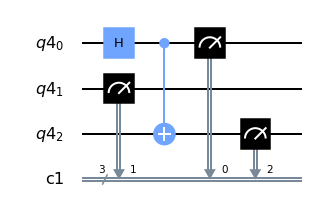

In [6]:
q, c = QuantumRegister(3), ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[2])
qc.measure(q, c)

## 绘制
qc.draw('mpl')

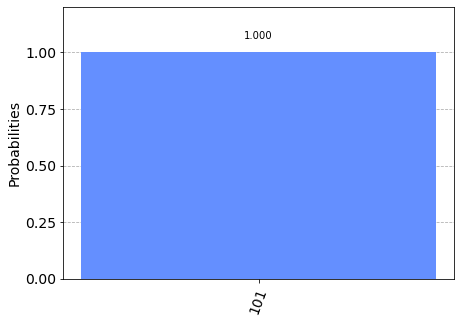

In [7]:
## 结果
job = execute(qc, backend=backend)
plot_histogram(job.result().get_counts(qc))

In [8]:
job.result().get_statevector(qc, decimals=3)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

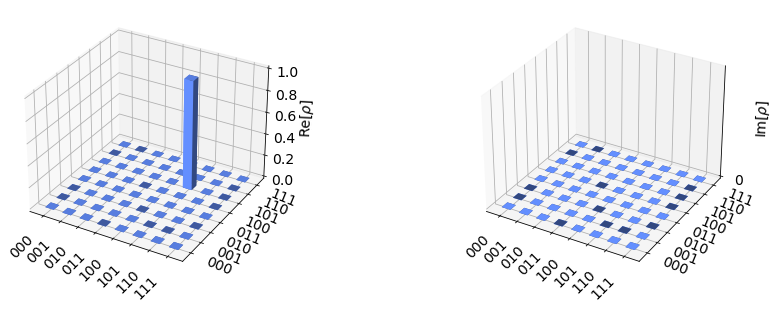

In [9]:
plot_state_city(job.result().get_statevector(qc, decimals=3))